## __LP5: MACHINE LEARNING & API__

### __1. Business Understanding__

Sepsis is a life-threatening condition triggered by an immune overreaction to infection, leading to organ failure or even death. Sepsis is associated with immediate death risk, often killing patients within one hour. This renders many laboratory tests and hospital analyses impractical for timely diagnosis and treatment. Being able to predict the survival of patients within minutes with as few and easy-to-retrieve medical features as possible is very important. __The objective of the study is to predict whether a patient in ICU will develop sepsis or not using machine learning models__. The dataset used for this study is from Kaggle database and contains the training and validation datasets. The training and testing datasets  contains 599 and 169 ICU patients respectively. The features in the training and testing datasets includes:

- **ID:** Unique identifier for patients' ID.
- **PRG:** Plasma glucose.
- **PL:** Blood Work Result-1 (mu U/ml).
- **PR:** Blood Pressure (mm Hg).
- **SK:** Blood Work Result-2 (mu U/ml).
- **TS:** Blood Work Result-3 (mu U/ml).
- **M11:** Body mass index (Weight in kg/(height in m)^2).
- **BD2:** Blood Work Result-4 (mu U/ml).
- **AGE:** Patients age (Age in years).
- **Insurance:** If the patient holds a valid insurance card.
- **Sepsis:** Positive: If the patient in ICU develops sepsis and Negative: Otherwise.

__Goal:__ This study aims to develop a machine learning classification model that can accurately predict whether a patient in ICU will develop sepsis or not based on the given features. The project will use the CRISP-DM methodology. 

__Assumptions__: Diastolic blood pressure measure was used.

#### __Hypothesis:__
**H0:** There is no correlation between age of the patient and sepsis infection.

**H1:** There is statistically significant correlation between age of the patient and sepsis infection. 





#### __1.1 Analytical Questions__

1. What is the distribution of sepsis infection with age?
2. How many patients with positive sepsis are under weight, have healthy weight, over weight and obesed?
3. What level of blood pressure had highest cases of sepsis ? 
4. Does having an insurance card have an impact on patient experiencing sepsis? 
5. What is the impact of plasma glucose (PRG) on cases of sepsis?

### __2. Data Understanding__ 

#### __2.1 Importation of Libraries__ 

In [1]:
# For Data Manipulation and Hypothesis Testing
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm


# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.preprocessing import StandardScaler


# Utilities
import warnings
warnings.filterwarnings("ignore")




#### __2.2 Data Loading__

In [2]:
# Load train data
train_df = pd.read_csv(r"C:\Users\USER\Documents\AZUBI Africa Class\Career Accelarator Projects\LP5-Machine-Learning-API\Data\Paitients_Files_Train.csv")
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


__Insight:__
- Column "Sepssis" is wrongly spelt.

In [3]:
# Correct spelling error of the column

train_df.rename(columns={'Sepssis':'Sepsis'}, inplace=True)

In [4]:
# Drop ID column as it is not significant for model building

train_df.drop('ID', axis=1, inplace=True)

#### __2.3 Exploratory Data Analysis (EDA)__

In [5]:
# Create a copy and keep the original data file intact

train_eda_df = train_df.copy()


In [6]:
# Number of columns and rows in train dataset
print (train_eda_df.shape)
print(f"There are {train_eda_df.shape[0]} rows, and {train_eda_df.shape[1]} columns")

(599, 10)
There are 599 rows, and 10 columns


In [7]:
# Check info about train data   

train_eda_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepsis     599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [8]:
# Description of training dataset
train_eda_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0
Sepsis,599,2,Negative,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Insights:__
- The youngest patient was 21 years while the oldest patient was 81 years.
- The average BMI was 31.92. 

In [9]:
# Check for missing values

train_eda_df.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64

__Insights:__ There are no missing values in the dataset.

In [10]:
# Check for sum of missing values in the dataset

train_eda_df.isnull().sum().sum()


0

In [11]:
# Check for duplicates

train_eda_df.duplicated().sum()


0

__Insights:__ There are no duplicates in the dataset.


In [12]:

# check for unique values in each column in train dataset
for column in train_eda_df.columns:
    print (f'{column}')
    print (f'{train_eda_df[column].unique()}')
    print(f'There are {train_eda_df [column].nunique()} unique values')
    print('=' * 70)


PRG
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
There are 17 unique values
PL
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67]
There are 129 unique values
PR
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24]
There are 44 unique values
SK
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 

#### __2.4 Univariate Analysis__

In [13]:

# Plot histogram with specified colors
fig = px.histogram(train_eda_df, 
                   x="Sepsis", 
                   color="Sepsis", 
                   color_discrete_map={0: "darkblue", 1: "green"})

fig.update_layout(title="Distribution of Sepssis", 
                  xaxis_title="Sepsis", 
                  yaxis_title="Count", 
                  width=500, 
                  height=400)

fig.show()


__Insights:__ There is a class imbalance in Sepssis distribution with positive values of 208 and negative values of 391.

#### __2.5 Univariate Analysis__

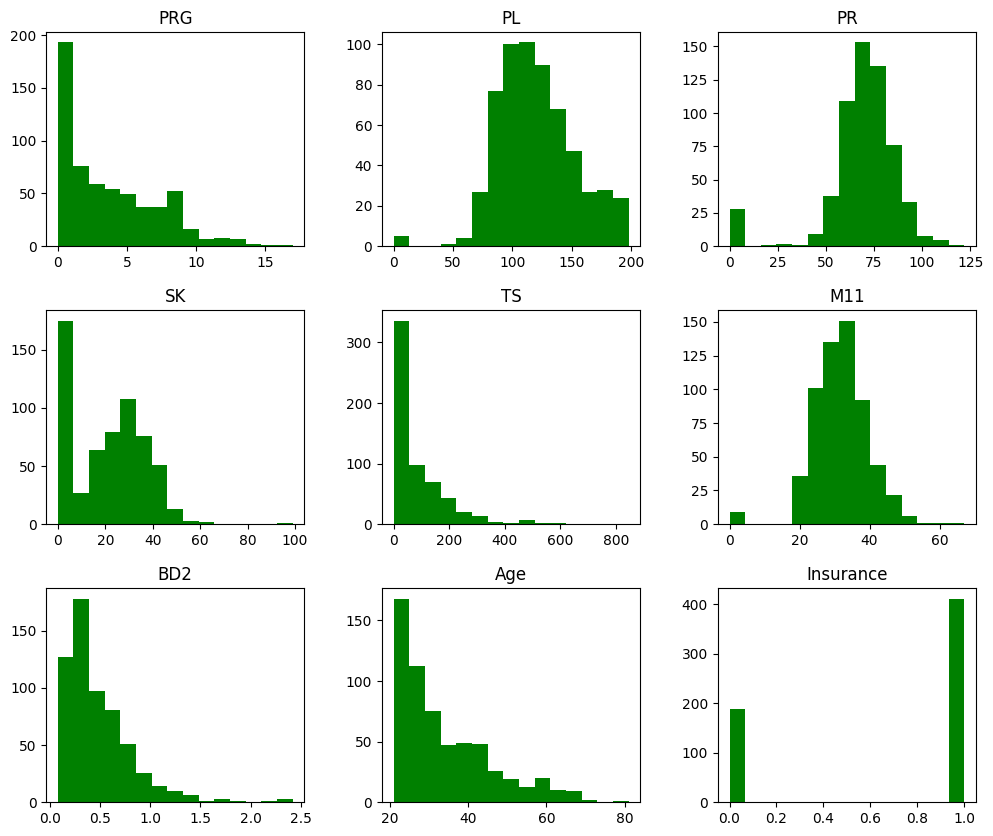

In [14]:
# Histograms for the features
train_eda_df.hist(figsize=(12,10), color='green', grid=False, bins=15)
plt.show()

__Insights:__ Most of the features are not normally distributed.

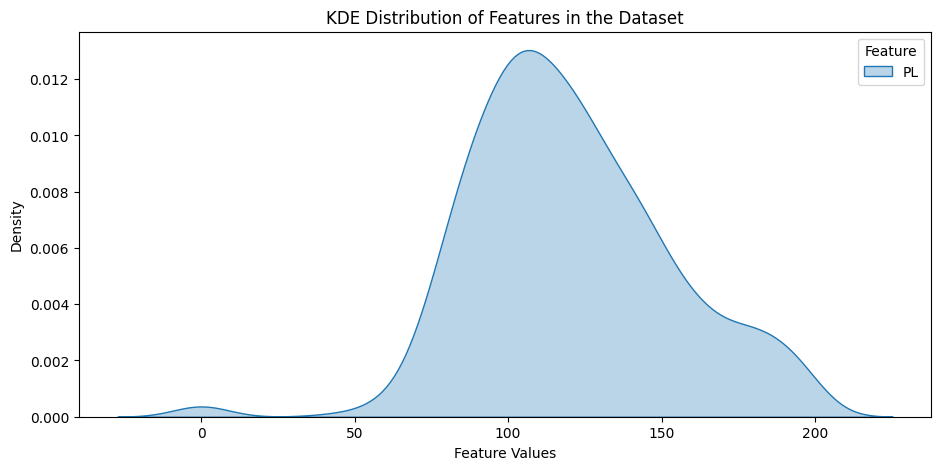

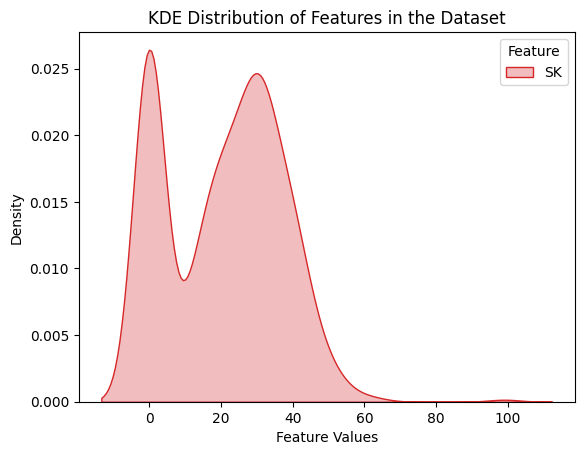

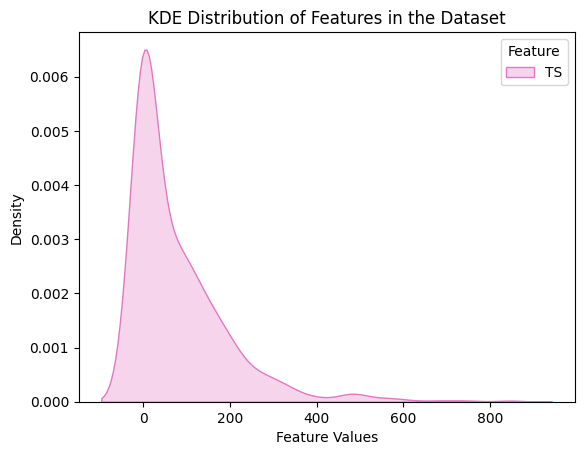

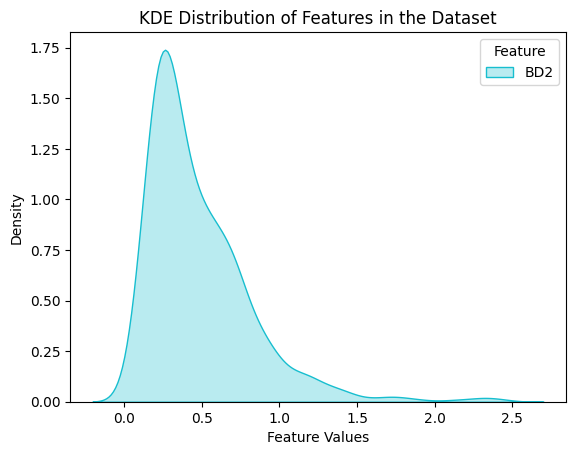

In [15]:
# Plot KDE distribution plot for blood-work results
cols_plot= train_eda_df.drop(['PRG','PR','M11','Age','Insurance','Sepsis'], axis=1).columns

plt.figure(figsize=(11,5))

# Create colormap object for assigning different colors
cmap = plt.get_cmap('tab10')
num_colors = len(cols_plot)

for i, col in enumerate(cols_plot):
    # Generate color based on index and number of colors
    color = cmap(i / (num_colors -1))
    # Create KDE plot for each feature on top of the histogram
    sns.kdeplot(train_eda_df [col], shade=True, color=color, alpha=0.3, label=col)

    # Adjust elements
    plt.legend(title='Feature')
    plt.title(f'KDE Distribution of Features in the Dataset')
    plt.xlabel('Feature Values')
    plt.ylabel('Density')
    plt.show()

__Insights:__ PL is slightly skewed to the left, SK is not normally distributed, then TS and BD2 have an almost normal distribution though not a perfect one. 

__Check for Outliers:__

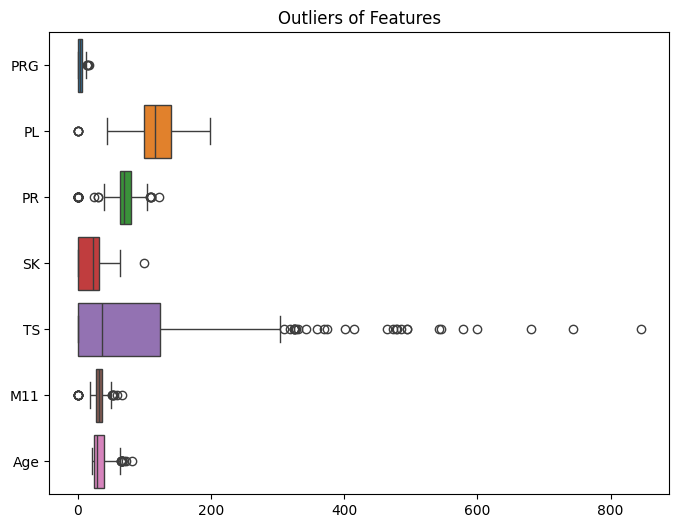

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(train_eda_df.drop(['BD2','Insurance'], axis=1), orient='h')
plt.title('Outliers of Features')

plt.show()

__Insights:__ There are a lot of outliers in TS column and also some outliers appears in columns Age, M11, SK, PL and PRG.

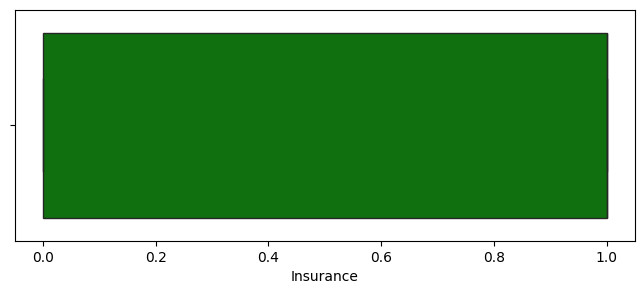

In [17]:
# Box for Insurance
plt.figure(figsize=(8,3))
sns.boxplot(train_eda_df['Insurance'], orient='h', color= "green")
plt.show()

__Insights:__ Column Insurance has no outliers.

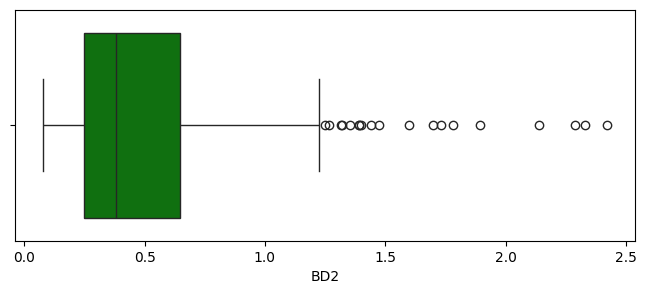

In [18]:
# Box for BD2
plt.figure(figsize=(8,3))
sns.boxplot(train_eda_df['BD2'], orient='h', color= "green")
plt.show()

__Insights:__ BD2 has some outliers.

#### __2.6 Bivariate Analysis__

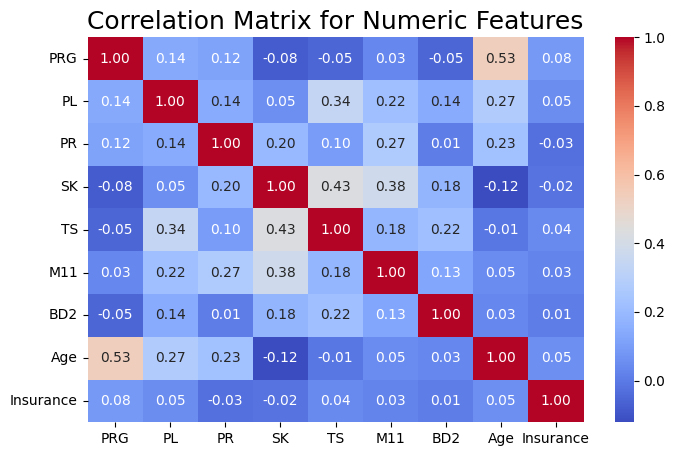

In [19]:
# Correlation Matrix for the 
numeric_features = train_eda_df.drop('Sepsis', axis=1)

corr = numeric_features.corr()

# visualize the correlation matrix

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Matrix for Numeric Features', fontsize=18)
plt.show()

__Insights:__ 
- There is a slight strong positive correlation between Age and PRG.
- Most of the other features have a weaker correlation.

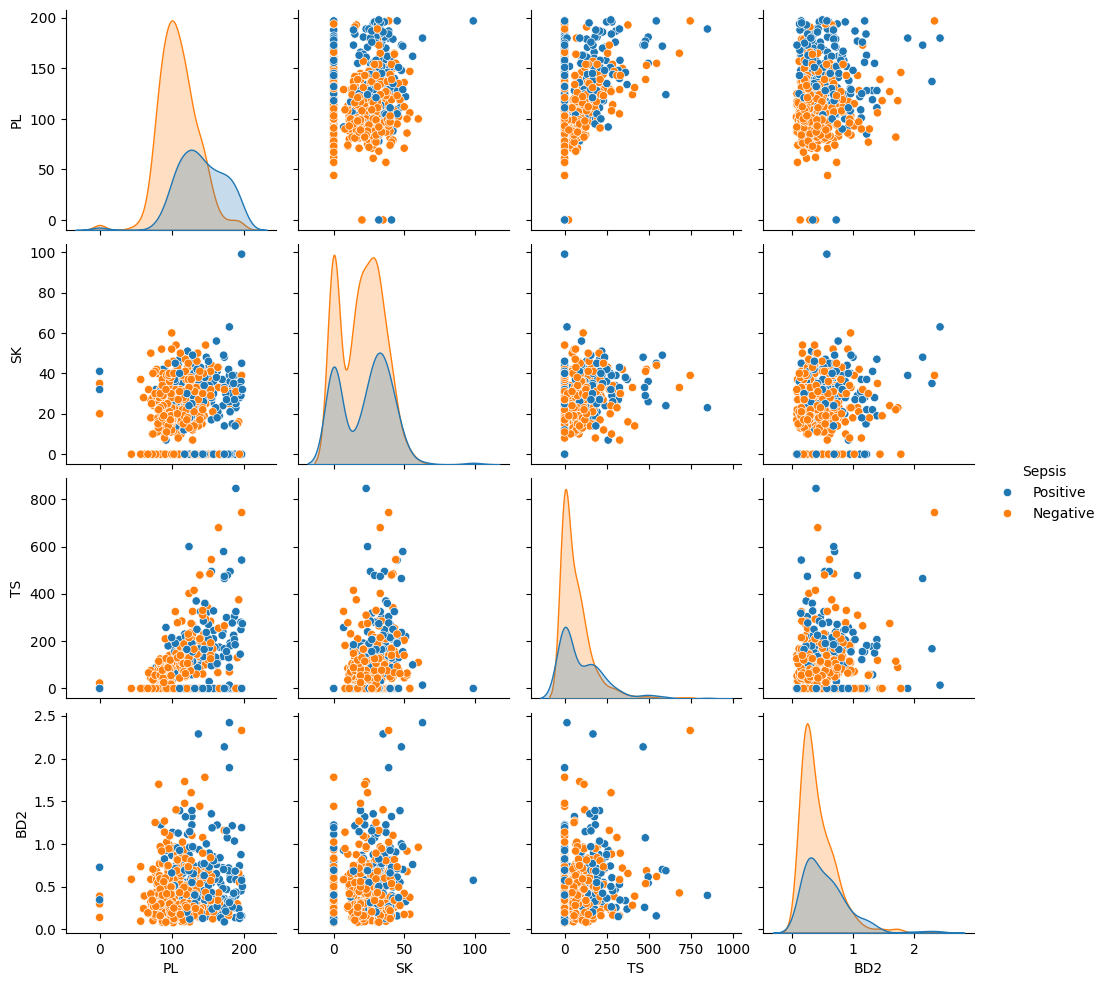

In [20]:
# Correlation of Sepsis and Blood Work Results

blood_work_data = train_eda_df[['Sepsis','PL','SK','TS','BD2']]
sns.pairplot(blood_work_data, hue= 'Sepsis')

plt.show()

#### __2.6 Multivariate Analysis__

 __2.6.1 Summary of the Insights About the Dataset:__

 - The dataset has 599 rows and 9 columns.
 - PL, SK, TS, and BD2 have an almost normal distribution.
 - TS, Age, M11, SK, PL, PRG have outliers.
 - Column Insurance has no outliers.
 - BD2 has some outliers.
 - Strong positive correlation between Age and PRG.
 - Most of the other features have a weaker correlation.
 

#### __2.7 Answering Analytical Questions__

 #### __1. What is the distribution of sepsis infection with age?__

In [21]:
fig = px.histogram(train_eda_df, 
                   x="Age", 
                   color="Sepsis", 
                   color_discrete_map={0: "darkblue", 1: "green"})

fig.update_layout(title="Distribution of Sepsis by Age", 
                  xaxis_title="Age", 
                  yaxis_title="Count", 
                  width=700,
                  height=400)

fig.show()

__Insights:__
- The highest rate of Sepsis was on patients aged 28 and 29 years with a total of 23 positive cases.
- The rate of positive cases of sepsis increased from age 20 to 29 years and then gradually dropped for the rest of the years to the age of 67 years. 
- No cases of Sepsis were reported for patients aged 70 to 80 years. 

#### __2. What is the distribution of positive sepsis cases for under weight, healthy weight, over weight and obesed?__

In [22]:
# Distribution of BMI with incidents of sepsis using violin plot

fig = px.violin(train_eda_df, y="M11", x="Sepsis", color="Sepsis", box=True, hover_data=train_eda_df.columns, color_discrete_map={0: "darkblue", 1: "green"})

fig.update_layout(title="Distribution of BMI with Sepsis", 
                  xaxis_title="Sepsis", 
                  yaxis_title="BMI", 
                  width=700,
                  height=500)

fig.show()


__Insights:__
- Categorization of BMI: underweight (BMI < 18.5), Healthy weight (BMI < 18.5 -24.9), Overweight (BMI < 25.0- 29.9), Obese weight (BMI = > 30.0 ).
- Cases of positive sepsis incidents among patients win ICU was highest at BMI 32.

#### __3. What level of blood pressure had highest cases of sepsis ?__

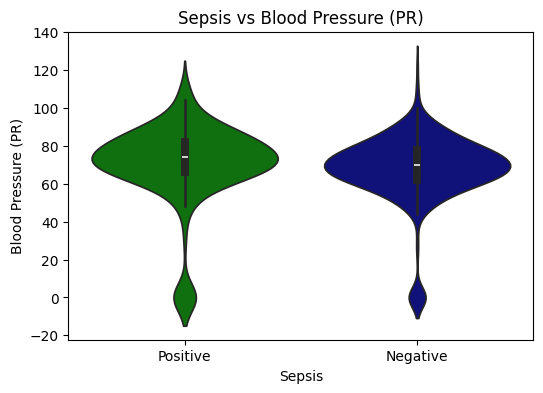

In [23]:
# Plot violin plot
custom_palette = ['green', 'darkblue']
plt.figure(figsize=(6, 4))
sns.violinplot(x='Sepsis', y='PR', data=train_eda_df, palette=custom_palette)
plt.title('Sepsis vs Blood Pressure (PR)')
plt.xlabel('Sepsis')
plt.ylabel('Blood Pressure (PR)')

plt.show()


__Insights:__
- Categories of blood pressure: Low blood pressure (< 60 mm Hg), Normal blood pressure (60 to 80), High blood pressure (> 80 mm Hg).
- The number of positive sepsis patients was highest between 70 and 80 mm Hg, Normal blood pressure level. 


#### __4. Does having an insurance card have an impact on patient experiencing sepsis?__ 

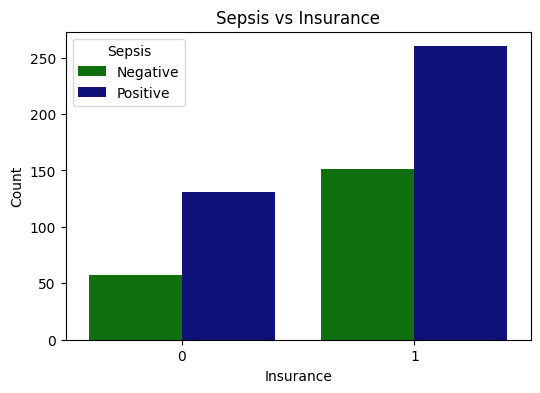

In [24]:
# Countplot for insurance card among patients and rate of sepsis

# Define a custom palette with colors for 'Negative' and 'Positive'
custom_palette = {'Negative': 'darkblue', 'Positive': 'green'}

plt.figure(figsize=(6, 4))
sns.countplot(x='Insurance', hue='Sepsis', data=train_eda_df, palette=custom_palette)
plt.title('Sepsis vs Insurance')
plt.xlabel('Insurance')
plt.ylabel('Count')
plt.legend(title='Sepsis', labels=['Negative', 'Positive'])
plt.show()

__Insights:__
- The sepsis cases were highest for patients with insurance card. 

#### __5. What is the impact of plasma glucose (PRG) on cases of sepsis?__

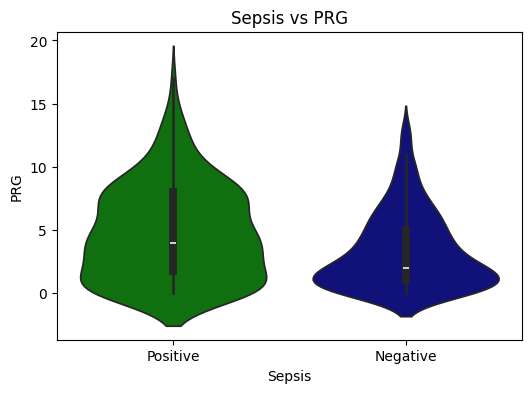

In [25]:
# Plot violin plot

plt.figure(figsize=(6, 4))
sns.violinplot(x='Sepsis', y='PRG', data=train_eda_df, palette=custom_palette)
plt.title('Sepsis vs PRG')
plt.xlabel('Sepsis')
plt.ylabel('PRG')

plt.show()

__Insights:__
- Categories of plasma glucose levels (PRG): Normal (3.9 to 7.8 mmol/L), Slightly elevated (7.8 to 10 mmol/L),elevated (> 10 mmol/L). Based on the violin plot highest cases of positive sepsis were observed at normal levels of PRG. The rate of positive sepsis decreased with increase in PRG levels.  


#### __2.8 Hypothesis Testing__ 

In [26]:
# Test hypothesis using Spearmanr method

Age = train_eda_df['Age']
sepsis_infection = train_eda_df['Sepsis']

# Calculate Spearman's rank correlation
corr_coefficient, p_value = spearmanr(Age, sepsis_infection)

print(f"Spearman's rank correlation coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.20f}")

# Interpret the p-value
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis (H0). There is a statistically significant correlation.")
else:
    print("Fail to reject the null hypothesis (H0). There is no statistically significant correlation.")



Spearman's rank correlation coefficient: 0.2878
P-value: 0.00000000000069566646
Reject the null hypothesis (H0). There is a statistically significant correlation.


__Insights:__
 - The Spearman's rank correlation coefficient (rho) is 0.1065, which indicates a weak positive correlation between Age and Sepsis. The p-value (0.0000000000000000) is less than the significance level (0.01), which means we reject the null hypothesis. This indicates that there is a statistically significant correlation between Age and Sepsis.

__Key Insights About the Dataset:__
- There are no missing values or duplicates in the dataset.
- The features are not normally distributed.
- The scales of the dataset are not equal especially for insurance and BD2. 
- There are some outliers in different features in the dataset.
- The Sepssis column (Target column) has an class imbalance with 208 positive values and 391 negative values.



__Actions to be Taken:__

 - Normalize or scale the data before applying machine learning algorithms.
 - Balance the Sepssis column by resampling the dataset or using techniques like SMOTE.


#### __3. Data Preparation__

In [27]:
# Convert insurance column to categorical column
train_df['Insurance'] = train_df['Insurance'].map({0: 'No', 1: 'Yes'})

In [28]:
# Replace outliers with Upper and lowe bounds
# Get the numerical columns
numerical_cols = train_df.select_dtypes(include='number').columns

# Calculate the upper and lower bounds for the numerical columns
q1 = train_df[numerical_cols].quantile(0.25)
q3 = train_df[numerical_cols].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers in the numerical columns
train_df_cleaned = train_df.copy()
train_df_cleaned[numerical_cols] = train_df_cleaned[numerical_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)



##### __3.1 Split Data and Encode y_Target__

In [29]:
# Select independent variables
X = train_df_cleaned.drop("Sepsis", axis=1)

In [30]:
# Select target variable

y = train_df_cleaned["Sepsis"]

In [31]:
# Split dataset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
# Encode y_Target data

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [33]:
# Check input features
input_features = X.columns

input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

#### __3.2 Prepare Pipelines__

In [34]:
# Getting the numerical columns
numerical_columns = X.select_dtypes('number').columns

numerical_columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object')

In [35]:
# Getting the categorical columns
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['Insurance'], dtype='object')

In [36]:
# Numeric Pipeline
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),  # impute numerical columns with median
    ('scaler', StandardScaler()),
    #('log_transformation', FunctionTransformer(np.log1p)),
])

# # Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # impute with most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor (ColumnTransformer)
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numerical_pipeline, numerical_columns),
    # ('cat_pipeline', categorical_pipeline, categorical_columns)
])

#### __4. Modeling and Evaluation__

In [37]:
# Create a list of models to use

models = [
    ("Logistic_Regression", LogisticRegression(random_state=42)),
    ("svc", SVC(random_state=42, probability=True)),
    ("Random_Forest", RandomForestClassifier(random_state=42)),
    ("Gradient_Boosting", GradientBoostingClassifier(random_state=42)),
]

#### __4.1 Train Models on Unbalanced Dataset__

In [38]:
# Create a table to store different metrics
metrics_table = pd.DataFrame(columns=["Model Name","Precision","Recall","Accuracy", "F1_score"])

# Initialize an empty dictionary to store pipelines

all_pipelines = {}

# Loop through the models to train and get metrics

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature Importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])

    # Fit training data to the pipeline
    pipeline.fit(X_train, y_train_encoded)

    # Make prediction using test dataset
    y_pred = pipeline.predict(X_test)

    # Store classification report values as a dictionary
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Store pipelines in dictionary
    all_pipelines[model_name] = pipeline

    # Grab values from the balanced metric dictionary
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Add values to the metrics table
    metrics_table.loc[len(metrics_table)] = [model_name, precision, recall, accuracy, f1_score]

# Sort the metrics table by f1_score in descending order

metrics_table.sort_values('F1_score', ascending=False)


,Model Name,Precision,Recall,Accuracy,F1_score
0,Logistic_Regression,0.750000,0.750000,0.750000,0.750000
3,Gradient_Boosting,0.736063,0.741667,0.741667,0.737503
1,svc,0.713556,0.708333,0.708333,0.710503
2,Random_Forest,0.690012,0.691667,0.691667,0.690791


In [39]:
# View one of the models (best model)

all_pipelines['Logistic_Regression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age'], dtype='object'))])),
                ('feature Importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000001E4FF9B4D30>)),
                ('classifier', LogisticRegression(random_state=42))])

#### __4.2 Train Models on Balanced Dataset__

In [40]:
# Create balanced metric table

balanced_metrics_table = pd.DataFrame(columns=["Model Name","Precision","Recall","Accuracy", "F1_score"])

# Initialize dictionary to store pipelines on balanced dataset

balanced_pipelines = {}

# Loop through models

for model_name, classifier in models:
    # Create a final pipeline from imblearn module
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote',SMOTE(sampling_strategy='auto')),
        ('feature Importance', SelectKBest(mutual_info_classif)),
        ('classifier', classifier),
    ])

    # Fit training data to the pipeline
    pipeline.fit(X_train, y_train_encoded)
    
    # Make prediction using test dataset
    y_pred = pipeline.predict(X_test)

    # Store classification report values as a dictionary
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Store pipelines in dictionary
    balanced_pipelines[model_name] = pipeline

    # Grab values from the balanced metric dictionary
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1_score = balanced_metrics['weighted avg']['f1-score']

    # Add values to the balanced metrics table
    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model_name, precision, recall, accuracy, f1_score]

# Sort the balanced metrics table by f1_score in descending order
balanced_metrics_table.sort_values('F1_score', ascending=False)



,Model Name,Precision,Recall,Accuracy,F1_score
3,Gradient_Boosting,0.769796,0.750000,0.750000,0.754736
2,Random_Forest,0.733853,0.725000,0.725000,0.728172
0,Logistic_Regression,0.742593,0.716667,0.716667,0.722569
1,svc,0.720909,0.691667,0.691667,0.698313


#### __4.3 Hyperparameter Tuning__

In [41]:
# # Initialize the tuned metrics table
tuned_metrics_table = pd.DataFrame(columns=["Model Name", "Precision", "Recall", "Accuracy", "F1_score"])

# Define simplified parameter grids for each model
param_grids = {
    'Logistic_Regression': {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
    },
    'Random_Forest': {
        'classifier__n_estimators': [45, 95],
        'classifier__max_depth': [20, 30],
    },
    'Gradient_Boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1],
    },
    'svc': {
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [1, 10],
    }
}

# Perform Randomized Search for each model
for model_name, pipeline in all_pipelines.items():
    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Initialize RandomizedSearchCV with reduced iterations and cross-validation folds
    random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=5, cv=2, scoring='f1_weighted', n_jobs=-1, random_state=42)
    
    # Fit RandomizedSearchCV to the training data
    random_search.fit(X_train, y_train_encoded)
    
    # Get the best parameters and best pipeline
    best_pipeline = random_search.best_estimator_
    all_pipelines[model_name] = best_pipeline
    
    # Make predictions using the tuned model
    y_pred = best_pipeline.predict(X_test)
    
    # Generate the classification report as a dictionary
    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Extract the relevant metrics
    accuracy = tuned_metrics['accuracy']
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1_score = tuned_metrics['weighted avg']['f1-score']
    
    # Add the metrics to the tuned metrics table
    tuned_metrics_table.loc[len(tuned_metrics_table)] = [model_name, precision, recall, accuracy, f1_score]

# Sort the tuned metrics table by F1_score in descending order
tuned_metrics_table = tuned_metrics_table.sort_values('F1_score', ascending=False)
tuned_metrics_table

,Model Name,Precision,Recall,Accuracy,F1_score
0,Logistic_Regression,0.750000,0.750000,0.750000,0.750000
1,svc,0.737939,0.741667,0.741667,0.739320
3,Gradient_Boosting,0.736063,0.741667,0.741667,0.737503
2,Random_Forest,0.706777,0.708333,0.708333,0.707505


#### __4.4 Persist Model__

In [42]:
# Persist the trained pipelines along with label encoder
for model_name, pipeline in all_pipelines.items():

    # Save pipeline object
    joblib.dump(pipeline, f'./models/{model_name}_pipeline.joblib')

# Save label encoder seperately
    joblib.dump(encoder, f'./models/label_encoder.joblib')